In [125]:
from copy import copy, deepcopy
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd 
import numpy as np
import sys
import re
%matplotlib inline


In [126]:
# # Load the Wine Dataset
df_wine = pd.read_csv("data/winemag-data-130k-v2.csv", encoding = 'utf8')

In [127]:
df_wine.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


In [128]:
#df_wine = df_wine.drop('points', 1)

In [129]:
print(df_wine.dtypes)

Unnamed: 0                 int64
country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object


In [130]:
# Finding the number of rows with NULL values
df_wine.isnull().sum()

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [131]:
# DROP region_2 column since most of the records NULL and we have region_1
df_wine = df_wine.drop('region_2', 1)

In [132]:
# DROP rows with NULL values
df_wine=df_wine.dropna()
df_wine.shape

(52106, 13)

In [133]:
df_wine['price'].describe()

count    52106.000000
mean        39.744847
std         36.662203
min          4.000000
25%         20.000000
50%         30.000000
75%         50.000000
max       2013.000000
Name: price, dtype: float64

# Convert categorical COUNTRY column to Numeric

In [134]:
df_wine['country'].unique()

array(['US', 'Spain', 'Italy', 'France', 'Argentina', 'Australia',
       'Canada'], dtype=object)

In [135]:
df_country = df_wine.country.str.get_dummies() # get the pivot of the country attribte
df_country.columns = ['from_' + col for col in df_country.columns] # naming the columns
df_wine = pd.concat([df_wine, df_country], axis=1) # combine main dataframe with country matrix dataframe
df_wine = df_wine.drop('country', axis=1) # drop the country attribute since different attributes per country value
df_wine.head(3)

,Unnamed: 0,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,from_Argentina,from_Australia,from_Canada,from_France,from_Italy,from_Spain,from_US
4,4,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,0,0,0,0,0,0,1
5,5,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,0,0,0,0,0,1,0
6,6,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,0,0,0,0,1,0,0


In [136]:
print(df_wine.dtypes)

Unnamed: 0                 int64
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
from_Argentina             int64
from_Australia             int64
from_Canada                int64
from_France                int64
from_Italy                 int64
from_Spain                 int64
from_US                    int64
dtype: object


<h1>Extracting Year from Title</h1>

In [137]:
# REGEX: Extract first numbers from Title - FAILED BECAUSE THERE ARE MANY NUMBERS IN TITLES
df = pd.DataFrame(df_wine['title'])
df['year'] = df['title'].str.extract('(\d+)')
df.year.unique()

array(['2012', '2011', '2013', '2010', '2007', '2009', '2015', '2014',
       nan, '2016', '2', '2006', '46', '2008', '1887', '2000', '2002',
       '2001', '1999', '772', '1', '2003', '2005', '2004', '2017', '14',
       '41', '3', '012', '1996', '33', '1492', '1898', '1997', '1998',
       '7200', '7', '12', '66', '5', '9', '6', '42', '1929', '075', '17',
       '1994', '10', '39', '4', '21', '38', '1995', '1988', '1992',
       '1827', '460', '735', '1872', '109', '204', '150', '50', '1877',
       '1875', '30', '1852', '1000', '1868', '15', '16', '360', '29',
       '1882', '51', '1989', '375', '158', '1860', '69', '1947', '13',
       '1991', '1985', '1927', '1904', '1847', '1856', '736', '010',
       '1752', '18401', '100', '24', '1607', '813', '44', '1978', '1919',
       '1986', '013', '09', '1990', '20', '500', '61', '1821', '1993',
       '23', '555', '428', '18', '999', '36', '01', '25', '34', '1945',
       '31', '88', '26', '733'], dtype=object)

In [138]:
# FUNCTION: FIND ALL NUMBERS IN THE TITLE, ADD THEM TO A LIST VARIABLE
def regex(x):
    L = re.findall(r'\d+', str(x))
    L_str = ",".join(str(x) for x in L)
    return str(L_str)

In [139]:
df['title_num_values'] = df['title'].apply(regex)

In [140]:
# FINDING HOW MANY NUMBERS DOES EACH TITLE INCLUDE
df['num_count'] = df.title_num_values.str.count(',') + 1
numeric_values_ct = df.num_count.max()
df.head()

,title,year,title_num_values,num_count
4,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,2012,2012,1
5,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,2011,2011,1
6,Terre di Giurfo 2013 Belsito Frappato (Vittoria),2013,2013,1
9,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,2012,2012,1
10,Kirkland Signature 2011 Mountain Cuvée Caberne...,2011,2011,1


In [141]:
# FOR ALL THE NUMERIC VALUES IN THE TITLES FIND THEM AND ADD TO A NEW DATA FRAME AS COLUMNS
def regex2(y):
    L = re.findall(r'\d+', str(y))
    X = np.array([L])
    new_L = []
    for x in X:
        a = x.tolist()
        b = []
        for i in range(1, numeric_values_ct + 1):
            if len(a) == numeric_values_ct:
                new_L.append(a)
                break
            else:
                for j in range(0, numeric_values_ct - len(a)):
                     b = a.extend([0])
    return new_L

In [142]:
xx = df['title'].apply(regex2)
new_list1 = []
new_list2 = []
new_list3 = []
new_list4 = []
new_list5 = []
for row in xx:
    new_list1.append(row[0][0])
    new_list2.append(row[0][1])
    new_list3.append(row[0][2])
    new_list4.append(row[0][3])
    new_list5.append(row[0][4])

In [143]:
df.insert(loc=0, column='N5', value= pd.Series(new_list5))
df.insert(loc=0, column='N4', value= pd.Series(new_list4))
df.insert(loc=0, column='N3', value= pd.Series(new_list3))
df.insert(loc=0, column='N2', value= pd.Series(new_list2))
df.insert(loc=0, column='N1', value= pd.Series(new_list1))

In [144]:
# SET 0 FOR ALL THE VALUES WHICH HAS MORE THAN 4 DIGIT
df.loc[df['N1'].astype(str).map(len) != 4 , 'N1'] = 0
df.loc[df['N2'].astype(str).map(len) != 4 , 'N2'] = 0
df.loc[df['N3'].astype(str).map(len) != 4 , 'N3'] = 0
df.loc[df['N4'].astype(str).map(len) != 4 , 'N4'] = 0
df.loc[df['N5'].astype(str).map(len) != 4 , 'N5'] = 0

# SET 0 FOR ALL THE VALUES GREATER THAN CURRENT YEAR
df.loc[df['N1'].astype(int) > 2018 , 'N1'] = 0
df.loc[df['N2'].astype(int) > 2018 , 'N2'] = 0
df.loc[df['N3'].astype(int) > 2018 , 'N3'] = 0
df.loc[df['N4'].astype(int) > 2018 , 'N4'] = 0
df.loc[df['N5'].astype(int) > 2018 , 'N5'] = 0

In [145]:
df['year_of_wine'] = df[['N5','N4','N3','N2','N1']].astype(int).max(axis=1)

In [146]:
# DELETE ALL THE YEARS BEFORE 1900 
df = df[['title', 'year_of_wine']]
df.loc[df['year_of_wine']  < 1900 , 'year_of_wine'] = 0
df.year_of_wine.unique()

array([2011, 2010, 2009, 2013, 2015,    0, 2012, 2014, 2006, 2007, 2016,
       2008, 2003, 2004, 2005, 2017, 1999, 1997, 1998, 2002, 2001, 2000,
       1996, 1995, 1989, 1904, 1992, 1978, 1919, 1985, 1993])

In [147]:
# CONCAT THE YEAR COLUMN TO MAIN DATAFRAME
try:
    if 'year_of_wine' not in df_wine:
        df_wine = pd.concat([df_wine, df.year_of_wine], axis=1)
except (RuntimeError, TypeError, NameError):
    print("Error: concating year to main dataframe")

In [148]:
df_wine.head(3)

,Unnamed: 0,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,from_Argentina,from_Australia,from_Canada,from_France,from_Italy,from_Spain,from_US,year_of_wine
4,4,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,0,0,0,0,0,0,1,2011
5,5,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,0,0,0,0,0,1,0,2010
6,6,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,0,0,0,0,1,0,0,2011


<h1>DATA</h1>

In [104]:
# DEFINE X and Y VARIABLES
df_X = df_wine[['price','year_of_wine','from_Argentina', 'from_Canada', 'from_France', 'from_Italy', 'from_Spain', 'from_US']]
df_Y = df_wine[['points']]
print(df_X.shape)

(52106, 8)


<h1>Information gain</h1>

In [105]:
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), threshold='1.25*median')
embeded_rf_selector.fit(X_train, y_train)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X_train.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')
print(embeded_rf_feature)

/Users/roxana/.virtualenvs/dojo3/lib/python3.7/site-packages/sklearn/feature_selection/from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


2 selected features
['price', 'year_of_wine']


In [106]:
# select only most important features
df_X = df_wine[['price','year_of_wine']]
df_Y = df_wine[['points']]
print(df_X.shape)

(52106, 2)


In [107]:
# devide the dataframe for training and testing 
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.20)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)


(41684, 2) (41684, 1)
(10422, 2) (10422, 1)


<h1>Outliers in Test Data</h1>

<h3>Regression WITH outliers in Training data</h3>

In [108]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
y_predictions_3 = lm.predict(X_test)

w = model.coef_ # parameters of model
b = model.intercept_ #intercept of model

print("coeficient: ", w)
print("intercept: ", b)

coeficient:  [[ 3.65060146e-02 -2.07270460e-06]]
intercept:  [87.58712015]


In [109]:
from copy import copy, deepcopy
# store results
ax3_y_test = deepcopy(y_test)
ax3_y_predictions = deepcopy(y_predictions_3)

In [110]:
# Accuracy score
print ('Accuracy:', model.score(X_test, ax3_y_test))
# Root mean squared error (RMSE)
print('RMSE:', np.sqrt(metrics.mean_squared_error(ax3_y_test, ax3_y_predictions)))
# Mean absolute error (MAE)
mae_3 = metrics.mean_absolute_error(ax3_y_test, ax3_y_predictions)
print('MAE:', mae_3)

Accuracy: 0.2142561324975959
RMSE: 2.628231803718488
MAE: 2.0915727950949297


<h3>Regression W/O outliers in Training Data</h3>

In [111]:
# Clean test data
def reject_outliers(data, m=2):
    return data[abs(data - np.mean(data)) < m * np.std(data)]

# store clean training data
X_train_clean = deepcopy(X_train)
y_train_clean = deepcopy(y_train)

# remove outliers from training data
print("Training data with outliers", X_train_clean.shape, y_train_clean.shape)

training_prices_wo_outliers = reject_outliers(X_train_clean['price'].values)
# remove points from test set if price was an outlier
min_price = min(training_prices_wo_outliers)
max_price = max(training_prices_wo_outliers)


training_data = pd.concat([X_train_clean, y_train_clean], axis=1)
training_clean = training_data.drop(training_data[training_data.price < min_price].index)
training_clean = training_clean.drop(training_clean[training_clean.price > max_price].index)

X_train_outlier_clean = training_clean[training_clean.columns[:-1].tolist()]
y_train_outlier_clean = training_clean['points'].values.reshape(-1, 1)
print("Training data without outliers", X_train_outlier_clean.shape, y_train_outlier_clean.shape)

Training data with outliers (41684, 2) (41684, 1)
Training data without outliers (40434, 2) (40434, 1)


In [112]:
# apply linear regression again
lm = linear_model.LinearRegression()
model = lm.fit(X_train_outlier_clean, y_train_outlier_clean)
y_predictions_4 = lm.predict(X_test)

w = model.coef_ # parameters of model
b = model.intercept_ #intercept of model

print("coeficient: ", w)
print("intercept: ", b)

coeficient:  [[7.47437568e-02 1.09372926e-06]]
intercept:  [86.26927808]


In [113]:
from copy import copy, deepcopy
# store results for chart 4
ax4_y_test = deepcopy(y_test)
ax4_y_predictions = deepcopy(y_predictions_4)

In [114]:
# Accuracy score
print ('Accuracy:', model.score(X_test, y_test))
# Root mean squared error (RMSE)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ax4_y_predictions)))
# Mean absolute error (MAE)
mae_4 = metrics.mean_absolute_error(y_test, ax4_y_predictions)
print('MAE:', mae_4)

Accuracy: -0.020630287401345315
RMSE: 2.995417703339693
MAE: 2.0997860608442496


<h1>Clean outliers from Test Data</h1>

In [115]:
# store clean test data
X_test_clean = deepcopy(X_test)
y_test_clean = deepcopy(y_test)

In [116]:
# ############################ REMOVE OUTLIERS FROM TESTING ##########################
print("Test data with outliers", X_test_clean.shape, y_test_clean.shape)
# clean prices from testing
test_prices_wo_outliers = reject_outliers(X_test_clean.values)
# remove points from test set if price was an outlier
min_price = min(test_prices_wo_outliers)
max_price = max(test_prices_wo_outliers)

test_data = pd.concat([X_test, y_test], axis=1)
test_data_clean = test_data.drop(test_data[test_data.price < min_price].index)
test_data_clean = test_data_clean.drop(test_data_clean[test_data_clean.price > max_price].index)

X_test_outlier_clean = test_data_clean[test_data_clean.columns[:-1].tolist()]
y_test_outlier_clean = pd.DataFrame(test_data_clean['points'])
print("Test data without outliers", X_test_outlier_clean.shape, y_test_outlier_clean.shape)
#######################################################################################


Test data with outliers (10422, 2) (10422, 1)
Test data without outliers (10422, 2) (10422, 1)


<h3>Regression WITH outliers in Training data</h3>

In [117]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train) # dirty training
y_predictions_1 = lm.predict(X_test_outlier_clean) # clean test

w = model.coef_ # parameters of model
b = model.intercept_ #intercept of model

print("coeficient: ", w)
print("intercept: ", b)

coeficient:  [[ 3.65060146e-02 -2.07270460e-06]]
intercept:  [87.58712015]


In [118]:
from copy import copy, deepcopy
# store results
ax1_y_test = deepcopy(y_test_outlier_clean)
ax1_y_predictions = deepcopy(y_predictions_1)


In [119]:
# Accuracy score
print ('Accuracy:', model.score(X_test_outlier_clean, y_test_outlier_clean))
# Root mean squared error (RMSE)
print('RMSE:', np.sqrt(metrics.mean_squared_error(ax1_y_test, ax1_y_predictions)))
# Mean absolute error (MAE)
mae_1 = metrics.mean_absolute_error(ax1_y_test, ax1_y_predictions)
print('MAE:', mae_1)


Accuracy: 0.2142561324975959
RMSE: 2.628231803718488
MAE: 2.0915727950949297


<h3>Regression W/O outliers in Training data</h3>

In [120]:
# apply linear regression again
lm = linear_model.LinearRegression()
model = lm.fit(X_train_outlier_clean, y_train_outlier_clean)
y_predictions_2 = lm.predict(X_test_outlier_clean)

w = model.coef_ # parameters of model
b = model.intercept_ #intercept of model

print("coeficient: ", w)
print("intercept: ", b)

coeficient:  [[7.47437568e-02 1.09372926e-06]]
intercept:  [86.26927808]


In [121]:
from copy import copy, deepcopy
# store results
ax2_y_test = deepcopy(y_test_outlier_clean)
ax2_y_predictions = deepcopy(y_predictions_2)


In [122]:
# Accuracy score
print ('Accuracy:', model.score(X_test_clean, y_test_clean))
# Root mean squared error (RMSE)
print('RMSE:', np.sqrt(metrics.mean_squared_error(ax2_y_test, y_predictions_2)))
# Mean absolute error (MAE)
mae_2 = metrics.mean_absolute_error(ax2_y_test, y_predictions_2)
print('MAE:', mae_2)


Accuracy: -0.020630287401345315
RMSE: 2.995417703339693
MAE: 2.0997860608442496


<h3>SUMMARY</h3>

In [123]:
 from IPython.display import HTML, display

 data = [["Training\Test", "W/ OUTLIERS","W/O OUTLIERS"],
         ["W/ OUTLIERS",mae_3, mae_1],
         ["W/O OUTLIERS",mae_4, mae_2],
         ]

 display(HTML(
    '<table><tr>{}</tr></table>'.format(
        '</tr><tr>'.join(
            '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
        )
 ))

Training\Test,W/ OUTLIERS,W/O OUTLIERS
W/ OUTLIERS,2.0915727950949297,2.0915727950949297
W/O OUTLIERS,2.0997860608442496,2.0997860608442496


************OUTLIERS IN TEST DATA **************
--> TEST OUTLIERS AND TRAINING OUTLIERS
max_y_predictions:  118
min_y_predictions:  87
MAE: 2.0915727950949297

--> ONLY OUTLIERS IN TEST
max_y_predictions:  149
min_y_predictions:  86
MAE: 2.0997860608442496

************CLEAN TEST DATA**************
--> ONLY OUTLIERS IN TRAINING:
max_y_predictions:  118
min_y_predictions:  87
MAE: 2.0915727950949297

--> NO OUTLIERS:
max_y_predictions:  149
min_y_predictions:  86
MAE: 2.0997860608442496


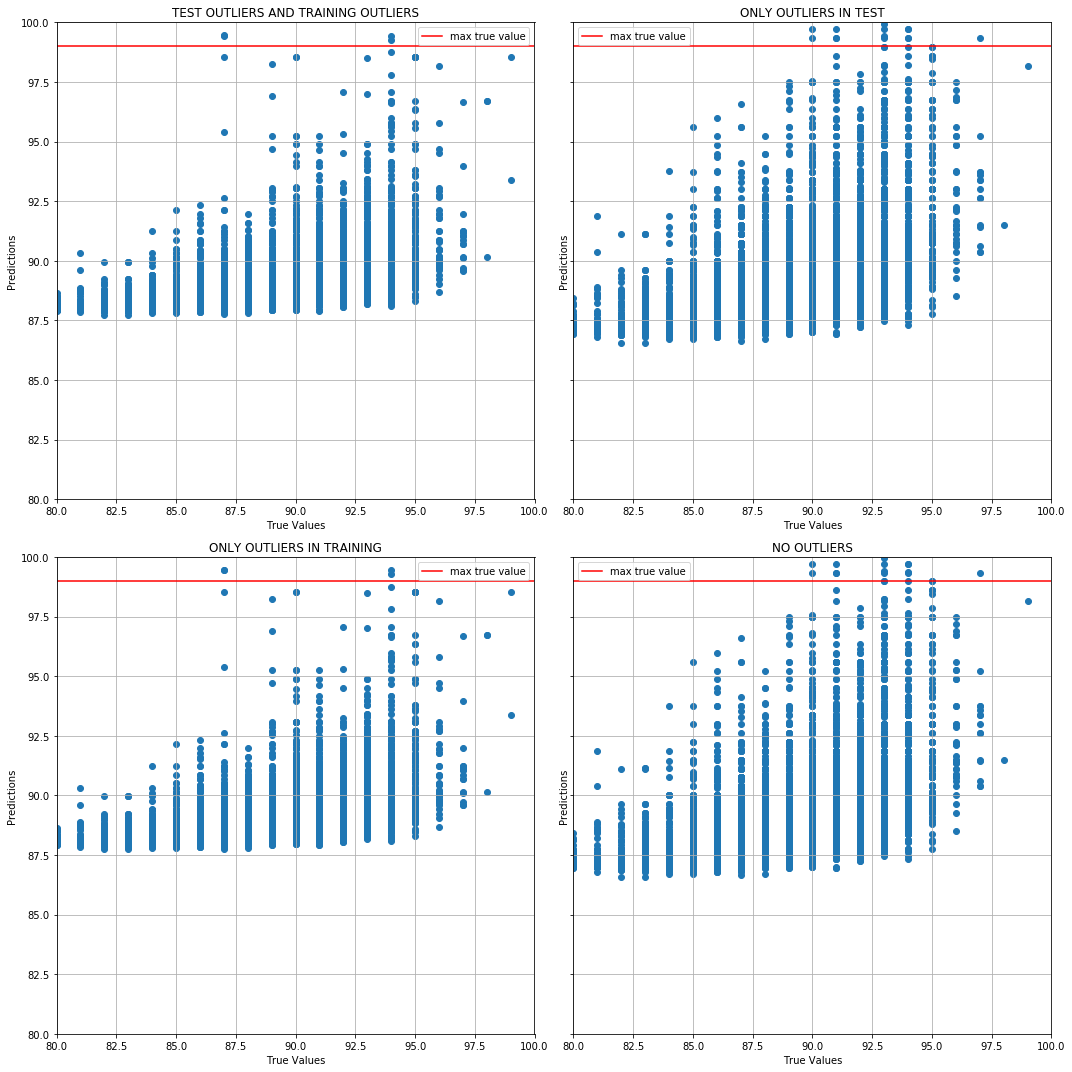

In [124]:
f, ((ax3, ax4), (ax1, ax2)) = plt.subplots(2, 2, sharey=True, figsize=(15,15))

# Dirty test outliers
print("************OUTLIERS IN TEST DATA **************")
# plot w/ outliers in training data
ax3.scatter(ax3_y_test, ax3_y_predictions)
ax3.set(xlabel='True Values', ylabel='Predictions')

max_y_predictions = int(max(ax3_y_predictions))
min_y_predictions = int(min(ax3_y_predictions))

print("--> TEST OUTLIERS AND TRAINING OUTLIERS")
print('max_y_predictions: ', max_y_predictions)
print('min_y_predictions: ', min_y_predictions)
print('MAE:', mae_3)
print()

max_y_true = int(max(ax3_y_test.points))
min_y_true = int(min(ax3_y_test.points))

ax3.axhline(max_y_true,label='max true value', color="red")

ax3.legend()
ax3.grid()
ax3.set_xlim([80,100])
ax3.set_ylim([80,100])
ax3.set_title('TEST OUTLIERS AND TRAINING OUTLIERS')

# plot w/o outliers in training data
ax4.scatter(ax4_y_test, ax4_y_predictions)
ax4.set(xlabel='True Values', ylabel='Predictions')

max_y_predictions = int(max(ax4_y_predictions))
min_y_predictions = int(min(ax4_y_predictions))

print("--> ONLY OUTLIERS IN TEST")
print('max_y_predictions: ', max_y_predictions)
print('min_y_predictions: ', min_y_predictions)
print('MAE:', mae_4)

max_y_true = int(max(ax4_y_test.points))
min_y_true = int(min(ax4_y_test.points))

ax4.axhline(max_y_true,label='max true value', color="red")

ax4.legend()
ax4.grid()
ax4.set_xlim([80,100])
ax4.set_ylim([80,100])
ax4.set_title('ONLY OUTLIERS IN TEST')

# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)

print()

# Clean test
print("************CLEAN TEST DATA**************")
# plot w/ outliers in training data
ax1.scatter(ax1_y_test, ax1_y_predictions)
ax1.set(xlabel='True Values', ylabel='Predictions')

max_y_predictions = int(max(ax1_y_predictions))
min_y_predictions = int(min(ax1_y_predictions))

print("--> ONLY OUTLIERS IN TRAINING:")
print('max_y_predictions: ', max_y_predictions)
print('min_y_predictions: ', min_y_predictions)
print('MAE:', mae_1)
print()

max_y_true = int(max(ax1_y_test.points))
min_y_true = int(min(ax1_y_test.points))

ax1.axhline(max_y_true,label='max true value', color="red")

ax1.legend()
ax1.grid()
ax1.set_xlim([80,100])
ax1.set_ylim([80,100])
ax1.set_title('ONLY OUTLIERS IN TRAINING')

# plot w/o outliers in training data
ax2.scatter(ax2_y_test, ax2_y_predictions)
ax2.set(xlabel='True Values', ylabel='Predictions')

max_y_predictions = int(max(ax2_y_predictions))
min_y_predictions = int(min(ax2_y_predictions))

print("--> NO OUTLIERS:")
print('max_y_predictions: ', max_y_predictions)
print('min_y_predictions: ', min_y_predictions)
print('MAE:', mae_2)

max_y_true = int(max(ax2_y_test.points))
min_y_true = int(min(ax2_y_test.points))

ax2.axhline(max_y_true,label='max true value', color="red")

ax2.legend()
ax2.grid()
ax2.set_xlim([80,100])
ax2.set_ylim([80,100])
ax2.set_title('NO OUTLIERS')

plt.tight_layout()

# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)

